## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import re
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

nlp = en_core_web_sm.load()

C:\Users\YL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
#Files size too big, takes too long to run, hence we shorten the row first
# df = df.iloc[1:500]
# df

## Data Preprocessing + EDA

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

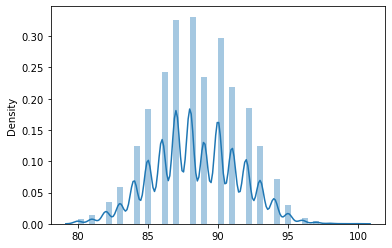

In [5]:
sns.distplot(df,x=df['points'])

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

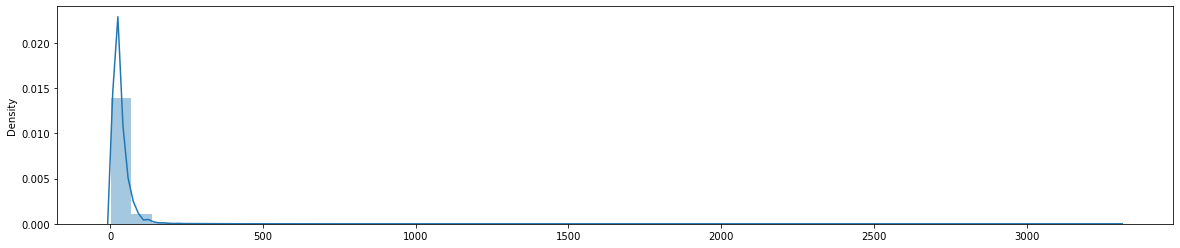

In [6]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df,x=df['price'],ax=ax)

In [7]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='country'>

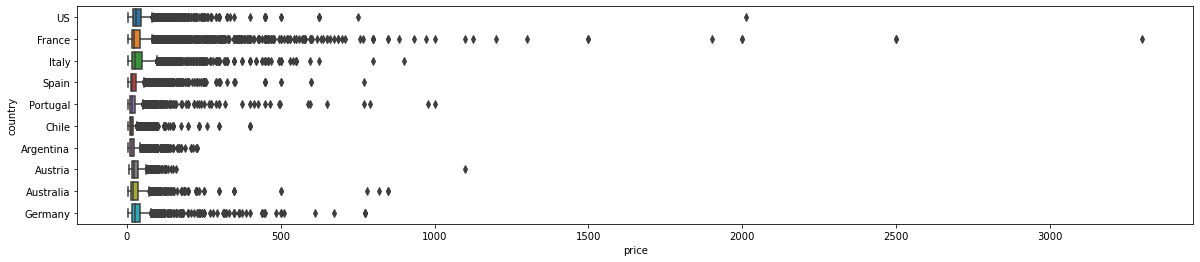

In [8]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='country',data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

## Categorising wine based on score

In [9]:
def cat(x):
    if  x < 85 :
        return "1"
    if x < 90 and x >= 85:
        return "2"
    if x < 95 and x>= 90:
        return "3"
    if x>=95:
        return "4"


df['category'] = df['points'].apply(lambda x: cat(x))

In [10]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,category
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,3
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,3


<AxesSubplot:xlabel='price', ylabel='category'>

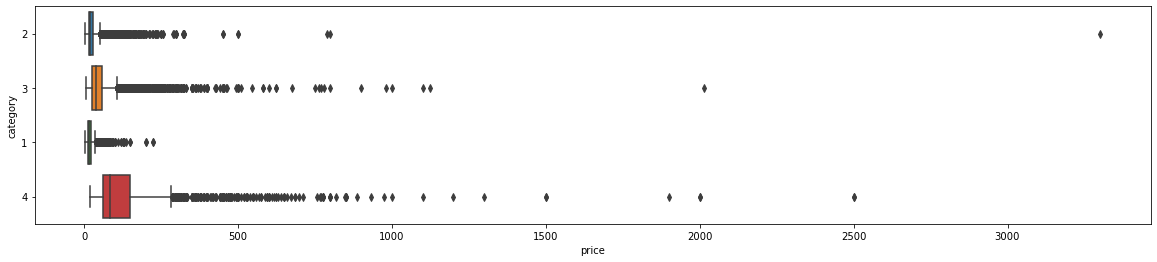

In [11]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='category',data=df,order=df.category.value_counts().iloc[:10].index,ax=ax)

In [12]:
grouped = df.groupby(df.category)
df_group1 = grouped.get_group('1')
df_group2 = grouped.get_group('2')
df_group3 = grouped.get_group('3')
df_group4 = grouped.get_group('4')

<AxesSubplot:xlabel='price', ylabel='category'>

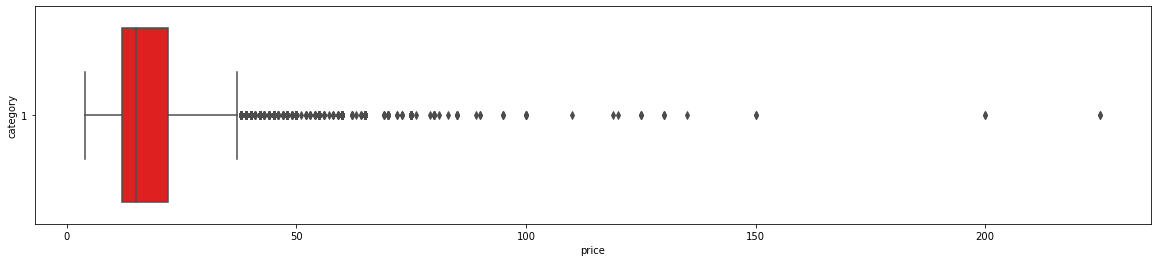

In [13]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='category',data=df_group1,color='red')

<AxesSubplot:xlabel='price', ylabel='category'>

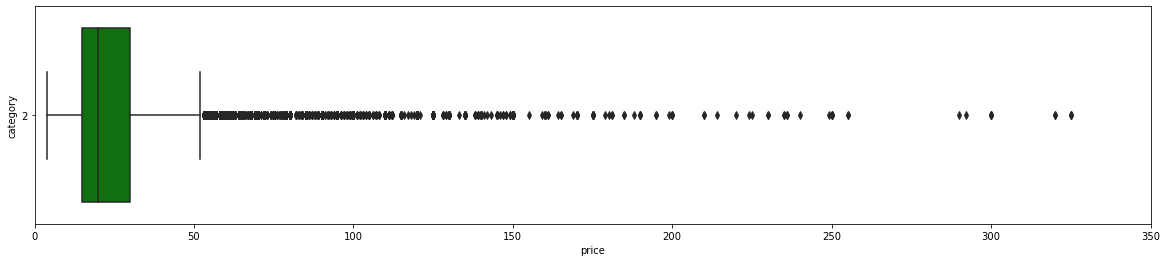

In [14]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0, 350))
sns.boxplot(x="price", y='category',data=df_group2,color='green')

<AxesSubplot:xlabel='price', ylabel='category'>

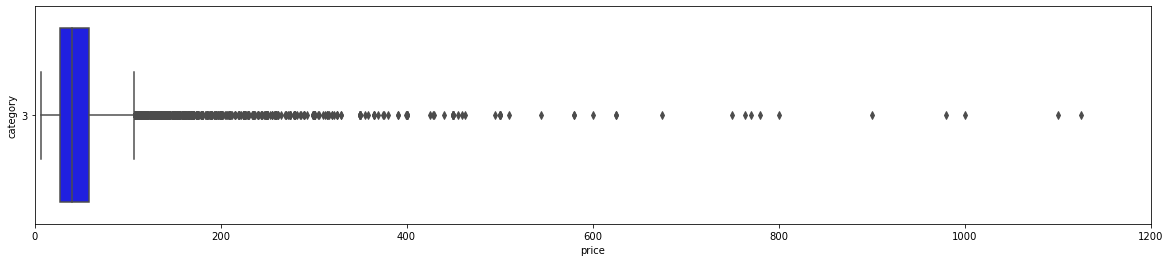

In [15]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0, 1200))
sns.boxplot(x="price", y='category',data=df_group3,color='blue')

<AxesSubplot:xlabel='price', ylabel='category'>

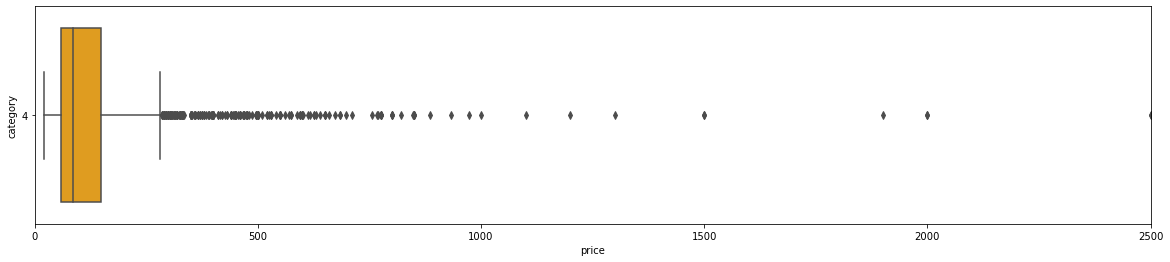

In [16]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0, 2500))
sns.boxplot(x="price", y='category',data=df_group4,color='orange')

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

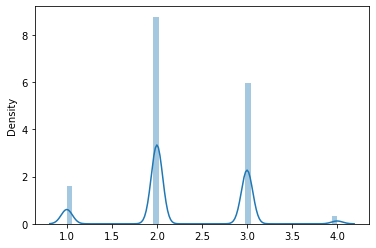

In [17]:
sns.distplot(df,x=df['category'])

In [18]:
words=[]
for i in df['description']:
    new_text=i.split(" ")
    for i in new_text:
        words.append(i)


In [19]:
from nltk import FreqDist

count_words=FreqDist(words)

In [20]:
count_words

FreqDist({'and': 346935, 'of': 172822, 'the': 168170, 'a': 157462, 'with': 115572, 'is': 96235, 'this': 72471, 'in': 59654, 'wine': 55989, 'to': 55263, ...})

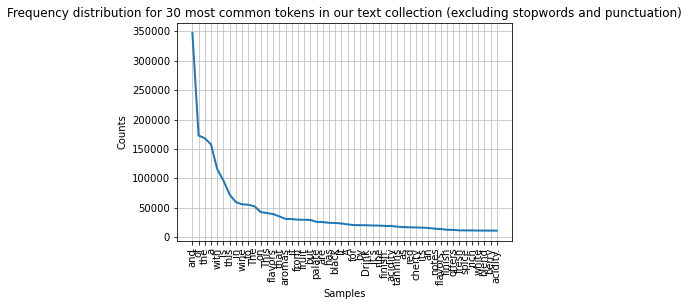

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [21]:
count_words.plot(50,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

## Initial Wordcloud findings

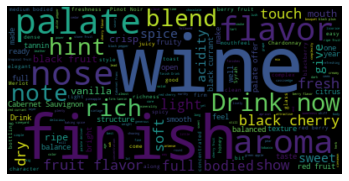

In [22]:
from wordcloud import WordCloud

text = " ".join(review for review in df.description)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
df_cat1=df[df['category'] == '1']
df_cat2=df[df['category'] == '2']
df_cat3=df[df['category'] == '3']
df_cat4=df[df['category'] == '4']

In [24]:
def plot_common_words(data):
    words=[]
    for i in data['description']:
        new_text=i.split(" ")
        for i in new_text:
            words.append(i)
    count_words=FreqDist(words)
    return count_words.most_common(20)

In [25]:
plot_common_words(df_cat1)

[('and', 27184),
 ('the', 12149),
 ('a', 11996),
 ('of', 10886),
 ('with', 10073),
 ('is', 7857),
 ('this', 5090),
 ('flavors', 4423),
 ('in', 4337),
 ('to', 4119),
 ('wine', 4067),
 ('on', 3984),
 ('The', 3595),
 ('This', 3543),
 ('aromas', 3020),
 ('but', 2931),
 ('that', 2818),
 ('are', 2425),
 ('fruit', 2245),
 ('it', 2196)]

In [26]:
plot_common_words(df_cat2)

[('and', 173795),
 ('of', 85876),
 ('a', 81203),
 ('the', 79892),
 ('with', 60605),
 ('is', 47199),
 ('this', 35992),
 ('in', 27952),
 ('to', 27690),
 ('wine', 27361),
 ('The', 26432),
 ('on', 21710),
 ('flavors', 21238),
 ('This', 21161),
 ('aromas', 17935),
 ('that', 17043),
 ('fruit', 15444),
 ('but', 14987),
 ('it', 14552),
 ('palate', 14225)]

In [27]:
plot_common_words(df_cat3)

[('and', 138009),
 ('of', 71752),
 ('the', 71293),
 ('a', 60770),
 ('with', 42528),
 ('is', 38381),
 ('this', 29688),
 ('in', 25752),
 ('wine', 22987),
 ('to', 21980),
 ('The', 21204),
 ('on', 16400),
 ('This', 15425),
 ('from', 15019),
 ('that', 14536),
 ('flavors', 13143),
 ('it', 13085),
 ('black', 12038),
 ('fruit', 11524),
 ('but', 10616)]

In [28]:
plot_common_words(df_cat4)

[('and', 7947),
 ('the', 4836),
 ('of', 4308),
 ('a', 3493),
 ('is', 2798),
 ('with', 2366),
 ('this', 1701),
 ('in', 1613),
 ('wine', 1574),
 ('to', 1474),
 ('The', 1400),
 ('from', 1058),
 ('it', 1046),
 ('that', 1022),
 ('This', 983),
 ('but', 831),
 ('black', 747),
 ('Drink', 729),
 ('for', 729),
 ('on', 714)]

## No. of wines by country

<AxesSubplot:xlabel='country', ylabel='count'>

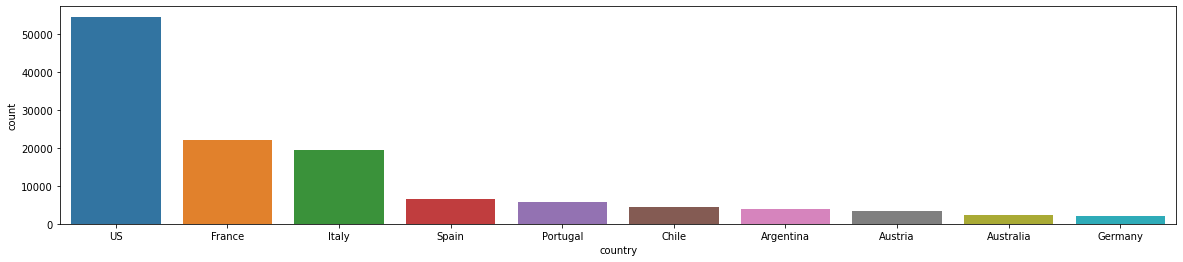

In [29]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="country", data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

## Top varieties of wine 

<AxesSubplot:xlabel='variety', ylabel='count'>

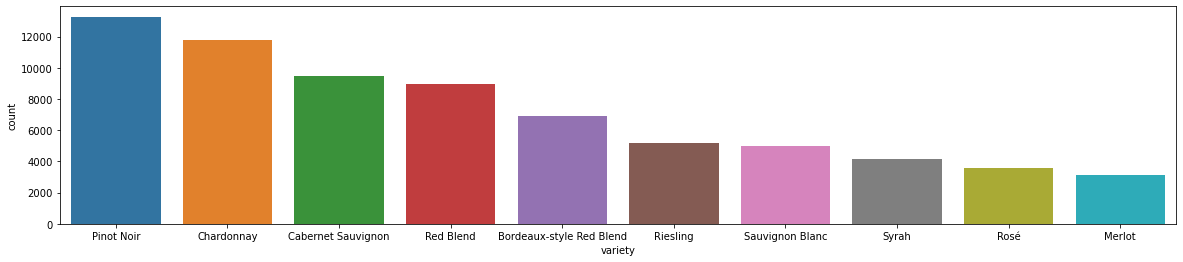

In [30]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="variety", data=df,order=df.variety.value_counts().iloc[:10].index,ax=ax)

## Spelling Checker

In [111]:
spell = SpellChecker()
for i in df['description']:
    #print(i)
    misspelled=spell.unknown(i)
    #print(misspelled)

## Sentiment Analysis - Data Preprocessing


In [32]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(comment):
    comment = re.sub("@[A-Za-z0-9]+","",comment) #Remove @ sign
    comment = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", comment) #Remove http links
    comment = re.sub(r'[^\w\s]','',comment)
    comment = comment.lower()
    comment = re.sub(r'\d+', '',comment) #remove numbers
    comment = " ".join(comment.split())
    comment = ''.join(c for c in comment if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    comment = comment.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) 
         if w.lower() in words or not w.isalpha())
    return comment
df['processed_description'] = df['description'].map(lambda x: cleaner(x))


[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
#Lemmatize Words

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df['lemmatised_content'] = df['processed_description'].apply(lambda x: lemmatizer(x))
df['lemmatised_content'] = df['lemmatised_content'].str.replace('-PRON-', '')
tokenizer = RegexpTokenizer(r'\w+')

df['final_content'] = df['lemmatised_content']


In [34]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,category,processed_description,lemmatised_content,final_content
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,3,citation is given as much as a decade of bottl...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3,gravel soil this wine its crisp and dry charac...,gravel soil this wine crisp and dry character...,gravel soil this wine crisp and dry character...
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,3,a dry style of gris this is crisp with some ac...,a dry style of gris this be crisp with some ac...,a dry style of gris this be crisp with some ac...


In [35]:
#df.to_csv('Part1beforeFlair.csv')

## Text Analysis using Flair

In [36]:
import flair
from flair.models import TextClassifier
from segtok.segmenter import split_single
from flair.data import Sentence

def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

In [37]:
classifier = TextClassifier.load('en-sentiment')

df['sentences'] = df.final_content.apply(make_sentences)
df['flair_scores'] = df.sentences.apply(get_scores)

2021-04-03 11:34:45,908 loading file C:\Users\YL\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [38]:
df = df.drop(columns='sentences')

In [39]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,[-0.997]
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,[-0.607]
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,[0.837]
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,[-0.998]
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,[0.682]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,[1.0]
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,3,citation is given as much as a decade of bottl...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...,[1.0]
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3,gravel soil this wine its crisp and dry charac...,gravel soil this wine crisp and dry character...,gravel soil this wine crisp and dry character...,[0.84]
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,3,a dry style of gris this is crisp with some ac...,a dry style of gris this be crisp with some ac...,a dry style of gris this be crisp with some ac...,[1.0]


In [40]:
df['flair_scores'] = [','.join(map(str, l)) for l in df['flair_scores']]
df["flair_scores"] = pd.to_numeric(df["flair_scores"], downcast="float")

In [41]:
conditions = [
(df['flair_scores'] >= 0.00),
(df['flair_scores'] < 0.00)
]

values = ['positive', 'negative']

df['flair_sentiment'] = np.select(conditions, values)

In [42]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),3,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,1.000,positive
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,3,citation is given as much as a decade of bottl...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...,1.000,positive
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,3,gravel soil this wine its crisp and dry charac...,gravel soil this wine crisp and dry character...,gravel soil this wine crisp and dry character...,0.840,positive
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,3,a dry style of gris this is crisp with some ac...,a dry style of gris this be crisp with some ac...,a dry style of gris this be crisp with some ac...,1.000,positive


## Vader

In [43]:
sentiment_analyser = SentimentIntensityAnalyzer()

sentiments_vader = []

for i in df.final_content:
    sentiments_vader.append(sentiment_analyser.polarity_scores(i).get('compound'))
    
sentiments_vader = np.asarray(sentiments_vader)

df['sentiment_vader'] = pd.Series(data=sentiments_vader)
df = df.reset_index(drop=True)

In [44]:
conditions = [
    (df['sentiment_vader'] >= 0.00),
     (df['sentiment_vader'] < 0.00)
    ]

values = ['positive', 'negative']

df['vader'] = np.select(conditions, values)

df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,variety,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,White Blend,Nicosia,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative,0.1531,positive
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Portuguese Red,Quinta dos Avidagos,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative,0.5423,positive
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Gris,Rainstorm,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,Riesling,St. Julian,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Noir,Sweet Cheeks,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,...,Tempranillo-Merlot,Tandem,2,blackberry and raspberry show a typical whiff ...,blackberry and raspberry show a typical whiff ...,blackberry and raspberry show a typical whiff ...,0.915,positive,0.1655,positive
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,...,Frappato,Terre di Giurfo,2,a bright informal red that with of candied ber...,a bright informal red that with of candied ber...,a bright informal red that with of candied ber...,1.000,positive,0.6369,positive
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,...,Gewürztraminer,Trimbach,2,this dry and restrained wine spice in profusio...,this dry and restrained wine spice in profusio...,this dry and restrained wine spice in profusio...,0.996,positive,0.0000,positive
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,...,Gewürztraminer,Heinz Eifel,2,savory dried thyme accent of peach in this bri...,savory dry thyme accent of peach in this brisk...,savory dry thyme accent of peach in this brisk...,1.000,positive,0.8462,positive
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,...,Pinot Gris,Jean-Baptiste Adam,2,this great depth of flavor with its fresh appl...,this great depth of flavor with fresh apple a...,this great depth of flavor with fresh apple a...,1.000,positive,0.7506,positive


## Textblob

In [45]:
from textblob import TextBlob

sentiments_textblob = []

for review in df.final_content:
    review = TextBlob(review)
    sentiments_textblob.append(review.sentiment.polarity)

sentiments_textblob = np.asarray(sentiments_textblob)   

df['sentiment_textblob'] = pd.Series(data=sentiments_textblob)
df= df.reset_index(drop=True)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,winery,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,Nicosia,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative,0.1531,positive,0.222222
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Quinta dos Avidagos,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative,0.5423,positive,0.103571
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Rainstorm,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative,0.025000
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,St. Julian,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive,0.166667
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Sweet Cheeks,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive,0.306667


In [46]:
conditions = [
    (df['sentiment_textblob'] > 0),
    (df['sentiment_textblob'] < 0)
    ]

values = ['positive', 'negative']

df['textblob'] = np.select(conditions, values)

df.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,category,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,2,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative,0.1531,positive,0.222222,positive
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,2,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative,0.5423,positive,0.103571,positive
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,2,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative,0.025000,positive
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,2,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive,0.166667,positive
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,2,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive,0.306667,positive
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,...,2,blackberry and raspberry show a typical whiff ...,blackberry and raspberry show a typical whiff ...,blackberry and raspberry show a typical whiff ...,0.915,positive,0.1655,positive,0.026667,positive
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,...,2,a bright informal red that with of candied ber...,a bright informal red that with of candied ber...,a bright informal red that with of candied ber...,1.000,positive,0.6369,positive,0.220000,positive
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,...,2,this dry and restrained wine spice in profusio...,this dry and restrained wine spice in profusio...,this dry and restrained wine spice in profusio...,0.996,positive,0.0000,positive,-0.002222,negative
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,...,2,savory dried thyme accent of peach in this bri...,savory dry thyme accent of peach in this brisk...,savory dry thyme accent of peach in this brisk...,1.000,positive,0.8462,positive,0.283333,positive
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,...,2,this great depth of flavor with its fresh appl...,this great depth of flavor with fresh apple a...,this great depth of flavor with fresh apple a...,1.000,positive,0.7506,positive,0.320833,positive


In [47]:
df['final_sentiment']=''
for data in range(0,len(df)):
    lst1 = []
    flair = df['flair_sentiment'][data]
    vader = df['vader'][data]
    textblob = df['textblob'][data]
    lst1.append(flair)
    if vader in lst1:
        df['final_sentiment'][data] = vader
    else:
        lst1.append(vader)
        if textblob in lst1:
            df['final_sentiment'][data] = textblob
        else:
            df['final_sentiment'][data] = ('unknown')
            

C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\YL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## Visualisation of different categories and their sentiment polarity

In [48]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,processed_description,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,include tropical fruit broom brimstone and dri...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative,0.1531,positive,2.222222e-01,positive,positive
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,this is ripe and fruity a wine that is smooth ...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative,0.5423,positive,1.035714e-01,positive,positive
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative,2.500000e-02,positive,positive
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive,1.666667e-01,positive,positive
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,much like the regular bottling from this comes...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive,3.066667e-01,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,1.000,positive,0.7331,positive,2.000000e-01,positive,positive
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,...,citation is given as much as a decade of bottl...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...,1.000,positive,0.5267,positive,1.387779e-17,positive,positive
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,...,gravel soil this wine its crisp and dry charac...,gravel soil this wine crisp and dry character...,gravel soil this wine crisp and dry character...,0.840,positive,0.1548,positive,8.750000e-02,positive,positive
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,...,a dry style of gris this is crisp with some ac...,a dry style of gris this be crisp with some ac...,a dry style of gris this be crisp with some ac...,1.000,positive,0.5267,positive,1.208333e-01,positive,positive


In [49]:
#df.to_csv('dfaftersentimentpolaritytag.csv')

In [ ]:
#Load the model 
df = pd.read_csv('dfaftersentimentpolaritytag.csv')

## Finding top N-Words in the data and filter them out 

In [50]:
findtopwords = df['lemmatised_content']
findtopwords

0         include tropical fruit broom brimstone and dry...
1         this be ripe and fruity a wine that be smooth ...
2         tart and snappy the of lime flesh and rind dom...
3         pineapple rind lemon pith and orange blossom s...
4         much like the regular bottling from this come ...
                                ...                        
129966    of honeysuckle and cantaloupe sweeten this del...
129967    citation be give as much as a decade of bottle...
129968    gravel soil this wine  crisp and dry character...
129969    a dry style of gris this be crisp with some ac...
129970    big rich and this be power by intense spicines...
Name: lemmatised_content, Length: 129971, dtype: object

In [51]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['lemmatised_content']), axis=1)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment,tokenized_sents
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,include tropical fruit broom brimstone and dry...,include tropical fruit broom brimstone and dry...,-0.997,negative,0.1531,positive,2.222222e-01,positive,positive,"[include, tropical, fruit, broom, brimstone, a..."
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,this be ripe and fruity a wine that be smooth ...,this be ripe and fruity a wine that be smooth ...,-0.607,negative,0.5423,positive,1.035714e-01,positive,positive,"[this, be, ripe, and, fruity, a, wine, that, b..."
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative,2.500000e-02,positive,positive,"[tart, and, snappy, the, of, lime, flesh, and,..."
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive,1.666667e-01,positive,positive,"[pineapple, rind, lemon, pith, and, orange, bl..."
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive,3.066667e-01,positive,positive,"[much, like, the, regular, bottling, from, thi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,1.000,positive,0.7331,positive,2.000000e-01,positive,positive,"[of, honeysuckle, and, cantaloupe, sweeten, th..."
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...,1.000,positive,0.5267,positive,1.387779e-17,positive,positive,"[citation, be, give, as, much, as, a, decade, ..."
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,...,gravel soil this wine crisp and dry character...,gravel soil this wine crisp and dry character...,0.840,positive,0.1548,positive,8.750000e-02,positive,positive,"[gravel, soil, this, wine, crisp, and, dry, ch..."
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,...,a dry style of gris this be crisp with some ac...,a dry style of gris this be crisp with some ac...,1.000,positive,0.5267,positive,1.208333e-01,positive,positive,"[a, dry, style, of, gris, this, be, crisp, wit..."


In [52]:
data = []
for line in df['tokenized_sents']:
    line = str(line)
    data_line = line.rstrip().split(',')
    data_line = line.rstrip().split(' ')
    for word in data_line:
        data.append(word)

        #remove punctuation in each word
data = [''.join(c for c in s if c not in string.punctuation) for s in data]
#print(data)
#remove empty strings
data = [s for s in data if s]
#print(data)

In [53]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    custom_words_rm = ['']
    final_words = [w for w in words if w not in custom_words_rm]
    return final_words

finalone = remove_stopwords(data)
finalone

['include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dry',
 'herb',
 'palate',
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'dry',
 'sage',
 'alongside',
 'brisk',
 'acidity',
 'ripe',
 'fruity',
 'wine',
 'smooth',
 'still',
 'structure',
 'firm',
 'fill',
 'juicy',
 'red',
 'berry',
 'acidity',
 'already',
 'drinkable',
 'although',
 'certainly',
 'well',
 'tart',
 'snappy',
 'lime',
 'flesh',
 'rind',
 'dominate',
 'green',
 'pineapple',
 'crisp',
 'acidity',
 'wine',
 'pineapple',
 'rind',
 'lemon',
 'pith',
 'orange',
 'blossom',
 'start',
 'palate',
 'bit',
 'opulent',
 'guava',
 'mango',
 'give',
 'way',
 'slightly',
 'astringent',
 'semidry',
 'finish',
 'much',
 'like',
 'regular',
 'bottling',
 'come',
 'across',
 'rather',
 'rough',
 'tannic',
 'rustic',
 'earthy',
 'herbal',
 'nonetheless',
 'think',
 'pleasantly',
 'unfussy',
 'country',
 'wine',
 'good',
 'companion',
 'hearty',
 'winter',
 'stew',
 'blackberry',
 'raspberry',
 'show'

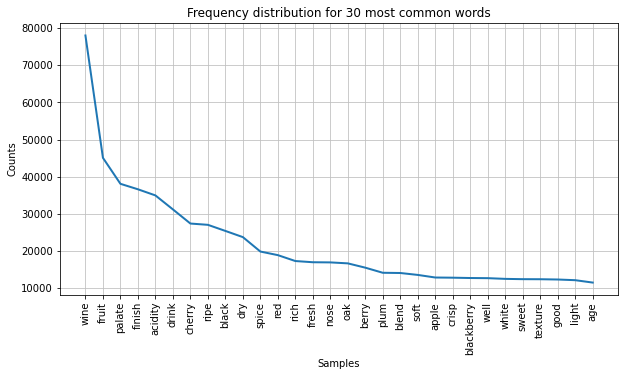

<AxesSubplot:title={'center':'Frequency distribution for 30 most common words'}, xlabel='Samples', ylabel='Counts'>

In [54]:
from nltk.probability import FreqDist
fdist = FreqDist(finalone)
plt.figure(figsize=(10, 5))
fdist.plot(30,title='Frequency distribution for 30 most common words')

In [56]:
tryout = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

In [114]:
topwordlist = []
extraction = tryout[:30] #extract top 30 words
for word,count in extraction:
    print (word,count)
    if word not in topwordlist:
        topwordlist.append(word)

wine 78040
fruit 45086
palate 38083
finish 36609
acidity 34958
drink 31190
cherry 27381
ripe 27034
black 25392
dry 23725
spice 19838
red 18870
rich 17282
fresh 16957
nose 16914
oak 16653
berry 15492
plum 14118
blend 14058
soft 13541
apple 12842
crisp 12795
blackberry 12707
well 12668
white 12476
sweet 12397
texture 12381
good 12305
light 12122
age 11480


## Remove Stopwords

In [115]:
#remove stop words
stop = topwordlist
df.final_content = df.final_content.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [116]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment,tokenized_sents
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,...,include tropical fruit broom brimstone and dry...,include tropical broom brimstone and herb the ...,-0.997,negative,0.1531,positive,2.222222e-01,positive,positive,"[include, tropical, fruit, broom, brimstone, a..."
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,this be ripe and fruity a wine that be smooth ...,this be and fruity a that be smooth while stil...,-0.607,negative,0.5423,positive,1.035714e-01,positive,positive,"[this, be, ripe, and, fruity, a, wine, that, b..."
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,tart and snappy the of lime flesh and rind dom...,tart and snappy the of lime flesh and rind dom...,0.837,positive,-0.1280,negative,2.500000e-02,positive,positive,"[tart, and, snappy, the, of, lime, flesh, and,..."
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,pineapple rind lemon pith and orange blossom s...,pineapple rind lemon pith and orange blossom s...,-0.998,negative,0.0000,positive,1.666667e-01,positive,positive,"[pineapple, rind, lemon, pith, and, orange, bl..."
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,much like the regular bottling from this come ...,much like the regular bottling from this come ...,0.682,positive,0.8176,positive,3.066667e-01,positive,positive,"[much, like, the, regular, bottling, from, thi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,...,of honeysuckle and cantaloupe sweeten this del...,of honeysuckle and cantaloupe sweeten this del...,1.000,positive,0.7331,positive,2.000000e-01,positive,positive,"[of, honeysuckle, and, cantaloupe, sweeten, th..."
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,...,citation be give as much as a decade of bottle...,citation be give as much as a decade of bottle...,1.000,positive,0.5267,positive,1.387779e-17,positive,positive,"[citation, be, give, as, much, as, a, decade, ..."
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,...,gravel soil this wine crisp and dry character...,gravel soil this and character be and fruity a...,0.840,positive,0.1548,positive,8.750000e-02,positive,positive,"[gravel, soil, this, wine, crisp, and, dry, ch..."
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,...,a dry style of gris this be crisp with some ac...,a style of gris this be with some also weight ...,1.000,positive,0.5267,positive,1.208333e-01,positive,positive,"[a, dry, style, of, gris, this, be, crisp, wit..."


## Grouping them into different categories

In [117]:
grouped = df.groupby(df.category)

In [118]:
df_group1 = grouped.get_group('1')
df_group2 = grouped.get_group('2')
df_group3 = grouped.get_group('3')
df_group4 = grouped.get_group('4')

In [119]:
df_group1 = df_group1[~df_group1.final_sentiment.str.contains("unknown", na=False)]
df_group2 = df_group2[~df_group2.final_sentiment.str.contains("unknown", na=False)]
df_group3 = df_group3[~df_group3.final_sentiment.str.contains("unknown", na=False)]
df_group4 = df_group4[~df_group4.final_sentiment.str.contains("unknown", na=False)]

In [120]:
sentiment_grouped_1 = df_group1.groupby(df.final_sentiment)
sentiment_grouped_2 = df_group2.groupby(df.final_sentiment)
sentiment_grouped_3 = df_group3.groupby(df.final_sentiment)
sentiment_grouped_4 = df_group4.groupby(df.final_sentiment)

In [121]:
df_group1_pos = sentiment_grouped_1.get_group('positive')
df_group1_neg = sentiment_grouped_1.get_group('negative')
df_group2_pos = sentiment_grouped_2.get_group('positive')
df_group2_neg = sentiment_grouped_2.get_group('negative')
df_group3_pos = sentiment_grouped_3.get_group('positive')
df_group3_neg = sentiment_grouped_3.get_group('negative')
df_group4_pos = sentiment_grouped_4.get_group('positive')
df_group4_neg = sentiment_grouped_4.get_group('negative')

## Positive attributes from Group 1

In [122]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()
    return words

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


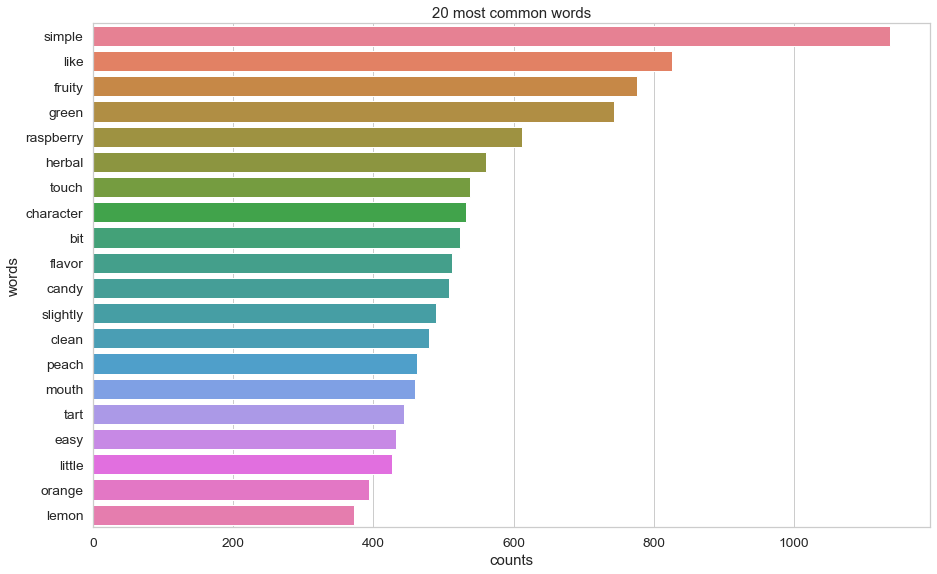

In [123]:
cat1pos = ''
if len(df_group1_pos)>0:
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(df_group1_pos['final_content'])

    # Visualise the 20 most common words
    top_n_words_group1_pos = plot_20_most_common_words(count_data, count_vectorizer)
    
    for i in top_n_words_group1_pos:
        if top_n_words_group1_pos[-1] == i:
            cat1pos += i
            break
        cat1pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 1

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


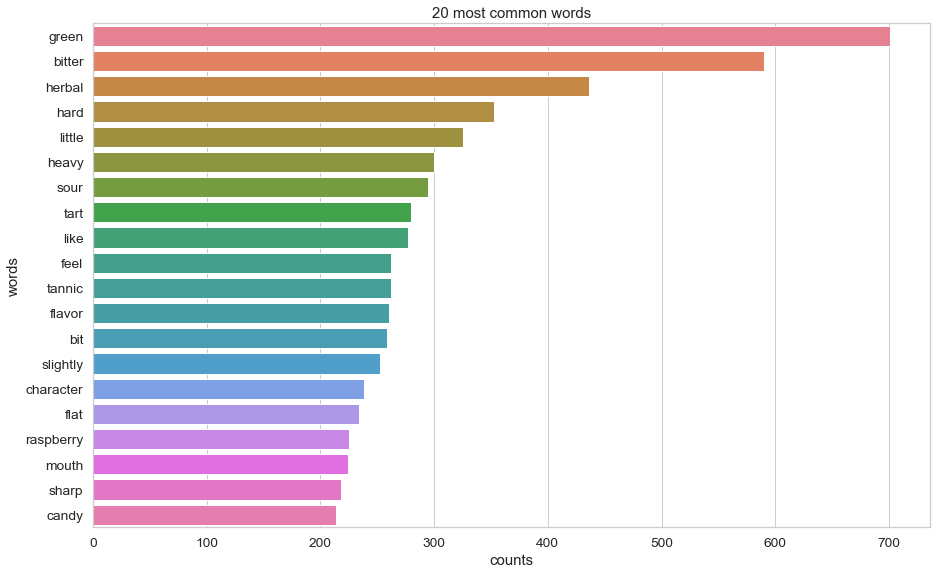

In [124]:
cat1neg = ''
if len(df_group1_neg)>0:
    # Fit and transform the processed titles
    count_data1 = count_vectorizer.fit_transform(df_group1_neg['final_content'])

    # Visualise the 20 most common words
    top_n_words_group1_neg = plot_20_most_common_words(count_data1, count_vectorizer)
    
    for i in top_n_words_group1_neg:
        if top_n_words_group1_neg[-1] == i:
            cat1neg += i
            break
        cat1neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 2

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


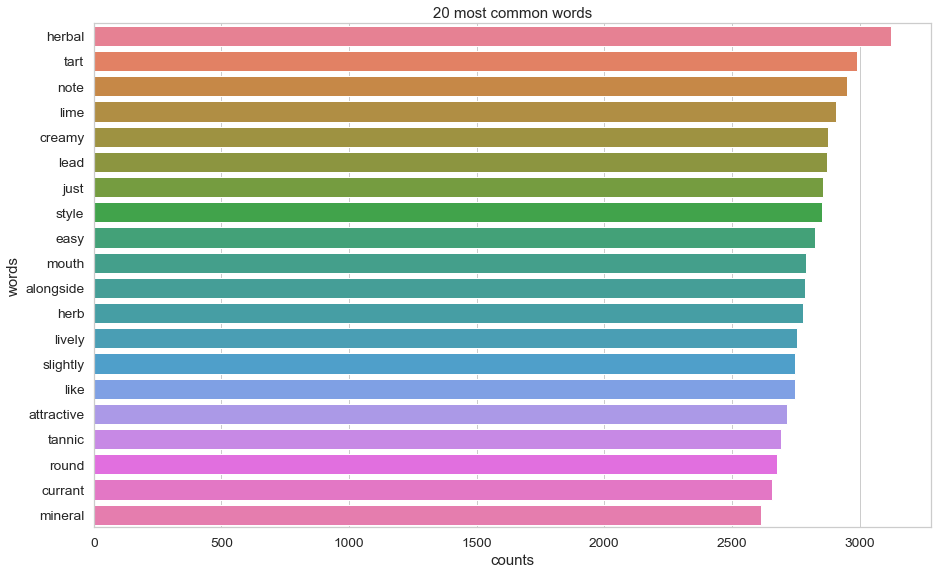

In [125]:
cat2pos = ''
if len(df_group2_pos)>0:
    # Fit and transform the processed titles
    count_data2 = count_vectorizer.fit_transform(df_group2_pos['final_content'])

    # Visualise the 20 most common words
    top_n_words_group2_pos = plot_20_most_common_words(count_data2, count_vectorizer)
    
    for i in top_n_words_group2_pos:
        if top_n_words_group2_pos[-1] == i:
            cat2pos += i
            break
        cat2pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 2


C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


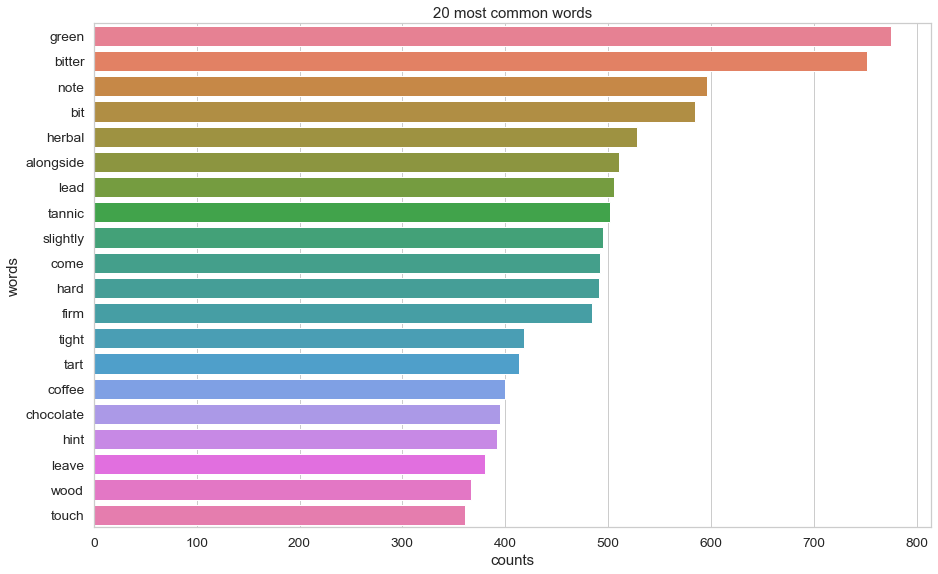

In [126]:
cat2neg = ''
if len(df_group2_neg)>0:
    # Fit and transform the processed titles
    count_data3 = count_vectorizer.fit_transform(df_group2_neg['final_content'])

    # Visualise the 20 most common words
    top_n_words_group2_neg = plot_20_most_common_words(count_data3, count_vectorizer)
    
    for i in top_n_words_group2_neg:
        if top_n_words_group2_neg[-1] == i:
            cat2neg += i
            break
        cat2neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 3

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


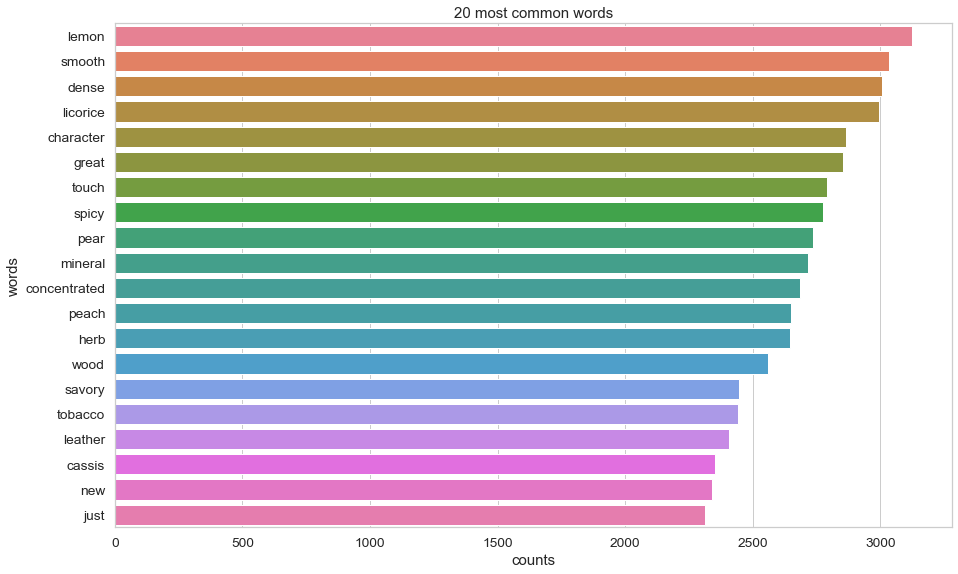

In [127]:
cat3pos = ''
if len(df_group3_pos)>0:
    # Fit and transform the processed titles
    count_data4 = count_vectorizer.fit_transform(df_group3_pos['final_content'])

    # Visualise the 20 most common words
    top_n_words_group3_pos = plot_20_most_common_words(count_data4, count_vectorizer)
    
    for i in top_n_words_group3_pos:
        if top_n_words_group3_pos[-1] == i:
            cat3pos += i
            break
        cat3pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 3


C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


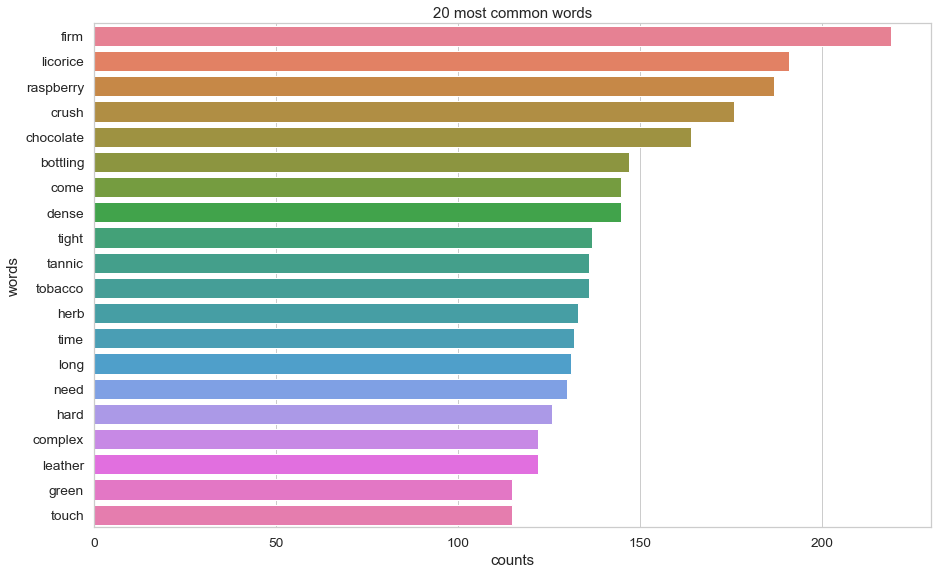

In [128]:
cat3neg = ''
if len(df_group3_neg)>0:
    # Fit and transform the processed titles
    count_data5 = count_vectorizer.fit_transform(df_group3_neg['final_content'])

    # Visualise the 20 most common words
    top_n_words_group3_neg = plot_20_most_common_words(count_data5, count_vectorizer)
    
    for i in top_n_words_group3_neg:
        if top_n_words_group3_neg[-1] == i:
            cat3neg += i
            break
        cat3neg += i + ","
else:
    print("No Data")

## Positive attributes from Group 4

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


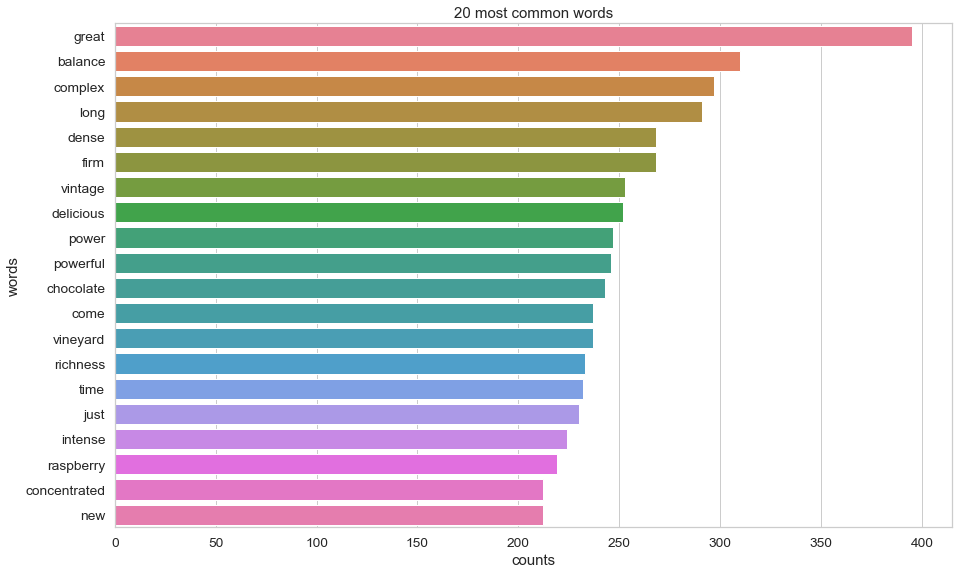

In [129]:
cat4pos = ''
if len(df_group4_pos)>0:
    # Fit and transform the processed titles
    count_data6 = count_vectorizer.fit_transform(df_group4_pos['final_content'])

    # Visualise the 20 most common words
    top_n_words_group4_pos = plot_20_most_common_words(count_data6, count_vectorizer)
    
    for i in top_n_words_group4_pos:
        if top_n_words_group4_pos[-1] == i:
            cat4pos += i
            break
        cat4pos += i + ","
else:
    print("No Data")

## Negative attributes from Group 4

C:\Users\YL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


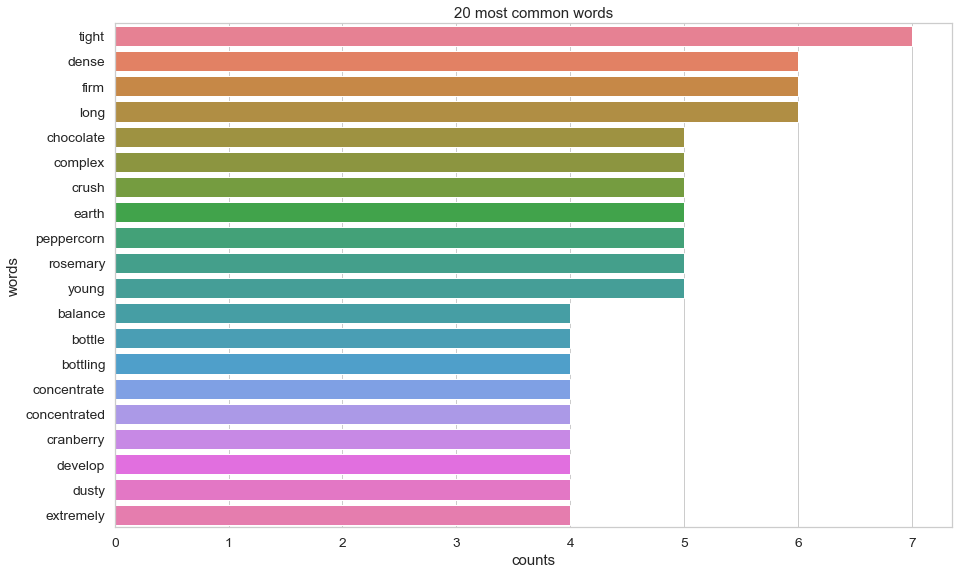

In [130]:
cat4neg = ''
if len(df_group4_neg)>0:
    # Fit and transform the processed titles
    count_data7 = count_vectorizer.fit_transform(df_group4_neg['final_content'])

    # Visualise the 20 most common words
    top_n_words_group4_neg = plot_20_most_common_words(count_data7, count_vectorizer)
    
    for i in top_n_words_group4_neg:
        if top_n_words_group4_neg[-1] == i:
            cat4neg += i
            break
        cat4neg += i + ","
    
else:
    print("No Data")

## Export Multiple Dataframe into a csv file

In [86]:
import xlsxwriter 

#create excel
outWorkbook = xlsxwriter.Workbook("final130kcontent2.0.xlsx")
outSheet = outWorkbook.add_worksheet()

#declare data 
outSheet.write("A1", "Categories")
outSheet.write("B1", "Words")

if len(cat1pos)>0:
    outSheet.write("A2", 'cat1pos')
    outSheet.write("B2", cat1pos)
else:
    outSheet.write("A2", 'cat1pos')
    outSheet.write("B2", 'No Data')
    
if len(cat1neg)>0:
    outSheet.write("A3", 'cat1neg')
    outSheet.write("B3", cat1neg)
else:
    outSheet.write("A3", 'cat1neg')
    outSheet.write("B3", 'No Data')

if len(cat2pos)>0: 
    outSheet.write("A4", 'cat2pos')
    outSheet.write("B4", cat2pos)
else:
    outSheet.write("A4", 'cat2pos')
    outSheet.write("B4", 'No Data')

if len(cat2neg)>0: 
    outSheet.write("A5", 'cat2neg')
    outSheet.write("B5", cat2neg)
else:
    outSheet.write("A5", 'cat2neg')
    outSheet.write("B5", 'No Data')    

if len(cat3pos)>0:
    outSheet.write("A6", 'cat3pos')
    outSheet.write("B6", cat3pos)
else:
    outSheet.write("A6", 'cat3pos')
    outSheet.write("B6", 'No Data')   

if len(cat3neg)>0:
    outSheet.write("A7", 'cat3neg')
    outSheet.write("B7", cat3neg)
else:
    outSheet.write("A7", 'cat3neg')
    outSheet.write("B7", 'No Data')    

if len(cat4pos)>0:
    outSheet.write("A8", 'cat4pos')
    outSheet.write("B8", cat4pos)
else:
    outSheet.write("A8", 'cat4pos')
    outSheet.write("B8", 'No Data')

if len(cat4neg)>0:
    outSheet.write("A9", 'cat4neg')
    outSheet.write("B9", cat4neg)
else:
    outSheet.write("A9", 'cat4neg')
    outSheet.write("B9", 'No Data')
outWorkbook.close()

## Recommendation for Business Owners

In [113]:
import numpy as np
final_polarity = input("Please enter the polarity of the wine review. [positive/negative] :")
final_category = input("Please enter the category of the wine. [1/2/3/4] :")
final_country = input("Please enter the country of the wine review. [US/Italy/Spain/France/Germany/Argentina/etc] :")
final_score = input("Please enter your budget. [50,77,99] :")

result = df.loc[np.logical_and(df['final_sentiment'] == str(final_polarity) , df['category'] == str(final_category))]
result = result.loc[np.logical_and(df['country'] == str(final_country) , df['price'] <= int(final_score))]
result

Please enter the polarity of the wine review. [positive/negative] :positive
Please enter the category of the wine. [1/2/3/4] :3
Please enter the country of the wine review. [US/Italy/Spain/France/Germany/Argentina/etc] :US
Please enter your budget. [83,88,99] (Remarks:Much be more than 80) :85


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,lemmatised_content,final_content,flair_scores,flair_sentiment,sentiment_vader,vader,sentiment_textblob,textblob,final_sentiment,tokenized_sents
121,121,US,The vineyard is one of the better Chardonnay s...,Stuhlmuller Vineyard,92,36.0,California,Alexander Valley,Sonoma,NaN,...,the vineyard be one of the well in valley and ...,the vineyard be one of the in valley and in th...,0.996,positive,0.7876,positive,2.189394e-01,positive,positive,"[the, vineyard, be, one, of, the, well, in, va..."
122,122,US,Defines Rockpile Zinfandel in intensity of fru...,Rockpile Cemetary Vineyard,92,39.0,California,Rockpile,Sonoma,NaN,...,zinfandel in intensity of fruit and high alcoh...,zinfandel in intensity of and high alcohol whi...,0.989,positive,0.3400,positive,9.904762e-02,positive,positive,"[zinfandel, in, intensity, of, fruit, and, hig..."
124,124,US,This sophisticated wine is mostly Cabernet Sau...,NaN,92,45.0,California,Napa Valley,Napa,NaN,...,this sophisticated wine be mostly cabernet whi...,this sophisticated be mostly which for the fir...,0.999,positive,0.9451,positive,3.031250e-01,positive,positive,"[this, sophisticated, wine, be, mostly, cabern..."
134,134,US,Give this young Cab time in the cellar to come...,NaN,91,78.0,California,Napa Valley,Napa,NaN,...,give this young cab time in the cellar to come...,give this young cab time in the cellar to come...,1.000,positive,0.6486,positive,1.622449e-01,positive,positive,"[give, this, young, cab, time, in, the, cellar..."
142,142,US,"A beautiful wine, sleek, crisp and ultra-dry, ...",NaN,90,17.0,California,Santa Lucia Highlands,Central Coast,NaN,...,a beautiful wine sleek crisp and with the most...,a beautiful sleek and with the most refined of...,1.000,positive,0.5994,positive,2.093333e-01,positive,positive,"[a, beautiful, wine, sleek, crisp, and, with, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,...,from one of the more popular for this varietal...,from one of the more popular for this varietal...,0.920,positive,-0.6327,negative,1.458333e-01,positive,positive,"[from, one, of, the, more, popular, for, this,..."
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,...,there s no about the use of oak in this wine w...,there s no about the use of in this which spen...,0.999,positive,0.5994,positive,4.500000e-01,positive,positive,"[there, s, no, about, the, use, of, oak, in, t..."
129950,129950,US,This opens with herbaceous dollops of thyme an...,Blocks 7 & 22,90,35.0,California,Napa Valley,Napa,Virginie Boone,...,this with herbaceous of thyme and earth and sl...,this with herbaceous of thyme and earth and sl...,0.988,positive,0.0000,positive,-1.222222e-01,negative,positive,"[this, with, herbaceous, of, thyme, and, earth..."
129952,129952,US,This Zinfandel from the eastern section of Nap...,NaN,90,22.0,California,Chiles Valley,Napa,Virginie Boone,...,this zinfandel from the eastern section of nap...,this zinfandel from the eastern section of nap...,0.999,positive,0.4404,positive,3.250000e-01,positive,positive,"[this, zinfandel, from, the, eastern, section,..."


## Clearing up for user to export to CSV

In [108]:
final_result = result.drop(columns=['Unnamed: 0','designation','province','region_1','region_2','taster_name'
                                   ,'taster_twitter_handle','lemmatised_content','final_content',
                                   'winery','processed_description','flair_scores','flair_sentiment',
                                  'sentiment_vader','vader','sentiment_textblob','textblob','tokenized_sents'])

In [109]:
final_result

,country,description,points,price,title,variety,category,final_sentiment
121,US,The vineyard is one of the better Chardonnay s...,92,36.0,Matrix 2007 Stuhlmuller Vineyard Chardonnay (A...,Chardonnay,3,positive
122,US,Defines Rockpile Zinfandel in intensity of fru...,92,39.0,Mauritson 2007 Rockpile Cemetary Vineyard Zinf...,Zinfandel,3,positive
124,US,This sophisticated wine is mostly Cabernet Sau...,92,45.0,Silverado 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,3,positive
134,US,Give this young Cab time in the cellar to come...,91,78.0,Clark-Clauden 2007 Cabernet Sauvignon (Napa Va...,Cabernet Sauvignon,3,positive
142,US,"A beautiful wine, sleek, crisp and ultra-dry, ...",90,17.0,Banyan 2007 Riesling (Santa Lucia Highlands),Riesling,3,positive
...,...,...,...,...,...,...,...,...
129945,US,Hailing from one of the more popular vineyards...,90,20.0,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,3,positive
129949,US,There's no bones about the use of oak in this ...,90,35.0,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,3,positive
129950,US,This opens with herbaceous dollops of thyme an...,90,35.0,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,3,positive
129952,US,This Zinfandel from the eastern section of Nap...,90,22.0,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,3,positive


In [110]:
#Exporting to CSV
#final_result.to_csv('winefilterbyuser.csv')